# Data and Sampling Distributions

In the era of big data, sampling is very useful to understand the population with performance and velocity.

## Random sampling and sample bias

A sample is a subset of the data set (population). An example of a sampling methodology is random sampling, in which each value in the population has the same probability of being selected, and can be done with or without replacement. <br>
Note: Data quality is more important than sample size in reducing bias.

## Imports

In [12]:
import pandas as pd
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

### Random sampling example with Loan Data

In [3]:
df = pd.read_csv('../../datasets/loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

In [5]:
df_loan_amnt_mean = round(df['loan_amnt'].mean(),2)
df_loan_amnt_mean

14317.28

In [6]:
#Using random_state to reproducibility
sample_df = df.sample(n=384, random_state=42)
sample_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,NaN,NaN,NaN,NaN,NaN,NaN,25100.0,NaN,NaN,NaN
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,NaN,NaN,NaN
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,NaN,NaN,NaN,NaN,NaN,NaN,17400.0,NaN,NaN,NaN
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,NaN,NaN,NaN


In [7]:
sample_df.shape

(384, 75)

In [8]:
sample_loan_amnt_mean = round(sample_df['loan_amnt'].mean(), 2)
sample_loan_amnt_mean

14205.79

In [9]:
abs(round(1-(sample_loan_amnt_mean/df_loan_amnt_mean), 4))

0.0078

## Bias

Bias is an error in sampling or measurement caused by a systematic - not random - error in the sampling process.<br>
To avoid bias in the sampling process, random sampling (with/without replacement/strata) is a useful method. <br>
_NOTE 1: In the era of big data, sampling is very useful, but it is also necessary to analyze whether it is necessary to use all the data._<br>
_NOTE 2: The sample mean is represented by x-bar and the population mean by u._

## Selection Bias

Bias caused by the data selection process that leads to a poor representation of the population.<br>
The target shuffling method is a permutation to test the validity of a data mining result, which in short is testing some hypothesis with different samples.<br>
Some selection bias includes:
* Nonrandom sampling;
* Cherry-picking;
* Selection that accentuate some statistics effect;
* Biased termination of an experimentation;
* Use the data to prove some idea rather that drawing conclusions from the data.

### Regression to the mean


Statistical phenomenon where in successive measurements of a variable, the values tend to be distributed close to the mean, so when extreme values are measured, the next values will most likely be close to the mean - back to the mean.

## Sampling distribution of a statistic

Distribution of a statistical measure based on several samples from a population. 
Ex: Sampling distribution of mean -> Follows a normal distribution based on the population mean and variance^2.
$$
Normal(u, \frac{var^2}{n})
$$

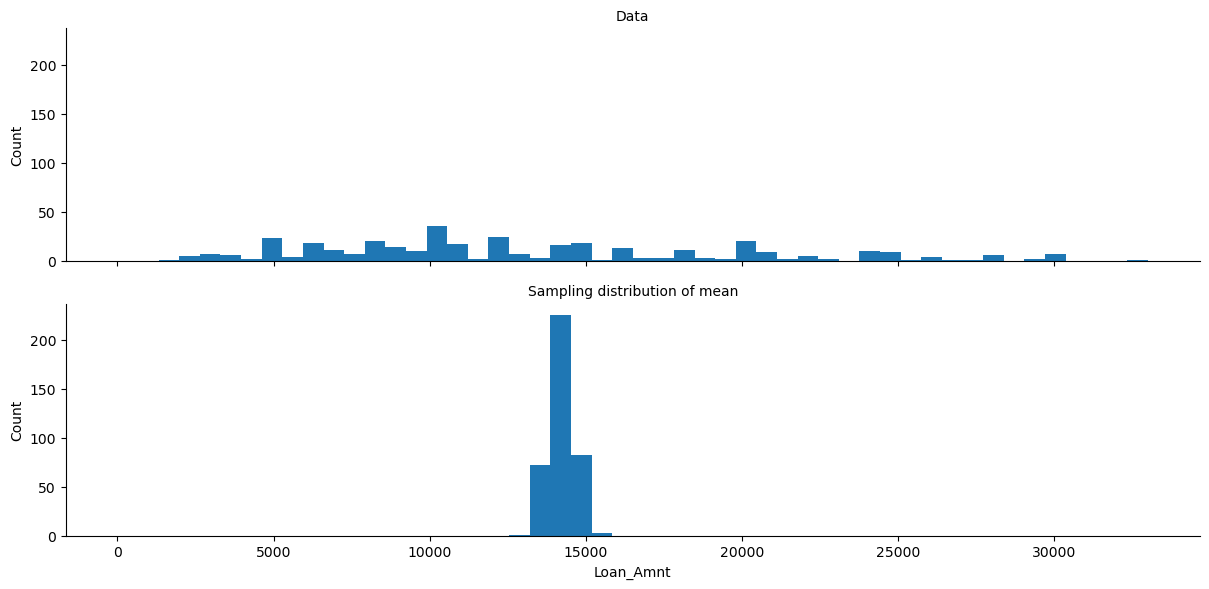

In [16]:
SIZE = 384
S_SIZE = 193
sample_data = pd.DataFrame({
    'loan_amnt': sample_df['loan_amnt'].sample(SIZE),
    'type': 'Data'
})
sample_mean = pd.DataFrame({
    'loan_amnt': [
        sample_data['loan_amnt'].sample(S_SIZE).mean() 
        for _ in range(SIZE)
    ],
    'type': 'Sampling distribution of mean'
})
result = pd.concat([sample_data, sample_mean])
graph = sns.FacetGrid(
    result, col='type', col_wrap=1, height=3, aspect=4
)
graph.map(plt.hist, 'loan_amnt', range=[0,33000], bins=50)
graph.set_axis_labels('Loan_Amnt', 'Count')
graph.set_titles('{col_name}')
plt.show()